# Real Estate Analysis

    * A banking institution requires actionable insights into mortgage-backed securities, geographic business investment, and real estate analysis. 
    * The mortgage bank would like to identify potential monthly mortgage expenses for each region based on monthly family income and rental of the real estate.
    * A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies.

In [1]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing train and test dataset
train_df = pd.read_csv("train.csv")

In [3]:
test_df = pd.read_csv("test.csv")

In [4]:
train_df.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [5]:
test_df.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [6]:
print(train_df.columns)
print(test_df.columns)

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [7]:
print(train_df.shape)
print(test_df.shape)

(16083, 80)
(11709, 80)


In [8]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16083 entries, 0 to 16082
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          16083 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     16083 non-null  int64  
 3   COUNTYID                     16083 non-null  int64  
 4   STATEID                      16083 non-null  int64  
 5   state                        16083 non-null  object 
 6   state_ab                     16083 non-null  object 
 7   city                         16083 non-null  object 
 8   place                        16083 non-null  object 
 9   type                         16083 non-null  object 
 10  primary                      16083 non-null  object 
 11  zip_code                     16083 non-null  int64  
 12  area_code                    16082 non-null  float64
 13  lat             

In [9]:
#description of dataset
train_df.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,16083.000000,0.0,16083.0,16083.000000,16083.000000,16083.000000,16082.000000,16082.000000,16082.000000,1.608200e+04,...,15961.000000,15961.000000,15961.000000,15961.000000,15961.000000,15927.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,257399.051359,NaN,140.0,85.794814,28.323447,49843.262389,595.920905,37.516737,-91.204804,1.278529e+08,...,40.314862,40.358018,22.188060,544.625371,2209.941921,0.640731,0.508158,0.047742,0.019317,0.100079
std,21358.484379,NaN,0.0,98.706980,16.389389,29558.402235,232.408086,5.607495,16.411840,1.260344e+09,...,5.926708,8.078722,2.547365,282.837028,1091.142986,0.228074,0.136808,0.037992,0.021293,0.048857
min,220342.000000,NaN,140.0,1.000000,1.000000,9.000000,201.000000,17.929085,-163.190903,4.113400e+04,...,16.008330,13.250000,0.556780,0.745760,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,239054.000000,NaN,140.0,29.000000,13.000000,25822.000000,405.000000,33.897645,-97.663302,1.807698e+06,...,36.878340,34.916670,21.324750,355.291590,1471.000000,0.504045,0.424735,0.020955,0.004568,0.065558
50%,257189.000000,NaN,140.0,63.000000,28.000000,47441.000000,614.000000,38.762541,-86.463770,4.916032e+06,...,40.363300,40.583330,22.531670,504.386890,2065.000000,0.692470,0.527025,0.038860,0.013610,0.095330
75%,275971.500000,NaN,140.0,109.000000,42.000000,77043.000000,801.000000,41.404046,-79.659606,3.374828e+07,...,43.562820,45.333330,23.584900,680.592390,2770.000000,0.819375,0.605595,0.065360,0.027880,0.128600
max,294334.000000,NaN,140.0,820.000000,72.000000,99925.000000,989.000000,67.074018,-65.379332,1.039510e+11,...,79.837390,82.250000,30.241270,6197.995200,27250.000000,1.000000,1.000000,0.714290,0.714290,0.636360


In [10]:
test_df.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,11709.000000,0.0,11709.0,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,1.170900e+04,...,11613.000000,11613.000000,11613.000000,11613.000000,11613.000000,11587.000000,11625.000000,11625.000000,11625.000000,11625.000000
mean,257525.004783,NaN,140.0,85.710650,28.489196,50123.418396,593.598514,37.405491,-91.340229,1.095500e+08,...,40.111999,40.131864,22.148145,550.411243,2233.003186,0.634194,0.505632,0.047960,0.019346,0.099191
std,21466.372658,NaN,0.0,99.304334,16.607262,29775.134038,232.074263,5.625904,16.407818,7.624940e+08,...,5.851192,7.972026,2.554907,280.992521,1072.017063,0.232232,0.139774,0.038693,0.021428,0.048525
min,220336.000000,NaN,140.0,1.000000,1.000000,601.000000,201.000000,17.965835,-166.770979,8.299000e+03,...,15.360240,12.833330,0.737110,0.251910,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238819.000000,NaN,140.0,29.000000,13.000000,25570.000000,404.000000,33.919813,-97.816561,1.718660e+06,...,36.729210,34.750000,21.270920,363.225840,1499.000000,0.492500,0.422020,0.020890,0.004500,0.064590
50%,257651.000000,NaN,140.0,61.000000,28.000000,47362.000000,612.000000,38.618092,-86.643344,4.835000e+06,...,40.196960,40.333330,22.472990,509.103610,2099.000000,0.687640,0.525270,0.038680,0.013870,0.094350
75%,276300.000000,NaN,140.0,109.000000,42.000000,77406.000000,787.000000,41.232973,-79.697311,3.204540e+07,...,43.496490,45.333330,23.549450,685.883910,2800.000000,0.815235,0.605660,0.065340,0.027910,0.128400
max,294333.000000,NaN,140.0,810.000000,72.000000,99929.000000,989.000000,64.804269,-65.695344,5.520166e+10,...,90.107940,90.166670,29.626680,4145.557870,15466.000000,1.000000,1.000000,0.714290,0.714290,0.362750


**Data Preparation:**

In [11]:
#checking for null values
train_df.isna().sum()

UID                0
BLOCKID        16083
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          156
married          111
married_snp      111
separated        111
divorced         111
Length: 80, dtype: int64

In [12]:
test_df.isna().sum()

UID                0
BLOCKID        11709
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          122
married           84
married_snp       84
separated         84
divorced          84
Length: 80, dtype: int64

In [13]:
#percentage of missing value for each column
missing_train=train_df.isnull().sum() *100/len(train_df)
missing_train

UID              0.000000
BLOCKID        100.000000
SUMLEVEL         0.000000
COUNTYID         0.000000
STATEID          0.000000
                  ...    
pct_own          0.969968
married          0.690170
married_snp      0.690170
separated        0.690170
divorced         0.690170
Length: 80, dtype: float64

In [14]:
missing_train.sort_values(inplace=True,ascending=False)
missing_train.head(20)

BLOCKID                        100.000000
hc_samples                       2.294348
hc_sample_weight                 2.294348
hc_mean                          2.294348
hc_median                        2.294348
hc_stdev                         2.294348
hc_mortgage_samples              2.114033
hc_mortgage_mean                 2.114033
hc_mortgage_median               2.114033
hc_mortgage_stdev                2.114033
hc_mortgage_sample_weight        2.114033
debt                             1.703662
second_mortgage_cdf              1.703662
home_equity_cdf                  1.703662
debt_cdf                         1.703662
home_equity_second_mortgage      1.703662
second_mortgage                  1.703662
home_equity                      1.703662
rent_gt_35                       1.094323
rent_gt_20                       1.094323
dtype: float64

In [15]:
missing_test=test_df.isnull().sum() *100/len(test_df)
missing_test.sort_values(inplace=True,ascending=False)
missing_test.head(20)

BLOCKID                        100.000000
hc_sample_weight                 2.476727
hc_samples                       2.476727
hc_stdev                         2.476727
hc_median                        2.476727
hc_mean                          2.476727
hc_mortgage_median               2.288838
hc_mortgage_sample_weight        2.288838
hc_mortgage_stdev                2.288838
hc_mortgage_samples              2.288838
hc_mortgage_mean                 2.288838
home_equity_second_mortgage      1.878897
debt_cdf                         1.878897
home_equity_cdf                  1.878897
second_mortgage_cdf              1.878897
debt                             1.878897
home_equity                      1.878897
second_mortgage                  1.878897
rent_gt_15                       1.272525
rent_gt_20                       1.272525
dtype: float64

In [16]:
variance_check = train_df.var()==0
variance_check.value_counts()

False    73
True      1
dtype: int64

In [17]:
#finding zero variance column
unhelpful_features = []
for feature in train_df:
    if max(train_df[feature]) == min(train_df[feature]):
        print(feature)
        unhelpful_features.append(feature)

SUMLEVEL
primary


* Since BLOCKID has 100 % null values and SUMLEVEL and primary columns have no predictive power and also zero variance. So we are dropping these columns.
* We only have around 2.5% Missing data. Hence we can safely delete these rows, without loosing much information.

In [18]:
train_df.drop(['BLOCKID', 'primary','SUMLEVEL'], axis=1, inplace=True)

In [19]:
train_df.shape

(16083, 77)

In [20]:
null_df = train_df[train_df.isna().any(axis=1)]
null_df.shape

(443, 77)

In [21]:
#dropping null values
train_df = pd.concat([train_df, null_df, null_df]).drop_duplicates(keep=False)
train_df.shape

(15640, 77)

In [22]:
test_df.drop(['BLOCKID', 'primary','SUMLEVEL'], axis=1, inplace=True)

In [23]:
test_df.shape

(11709, 77)

In [24]:
null_df_test = test_df[test_df.isna().any(axis=1)]
null_df_test.shape

(354, 77)

In [25]:
test_df = pd.concat([test_df, null_df_test, null_df_test]).drop_duplicates(keep=False)
test_df.shape

(11355, 77)

In [26]:
train_df.isna().any().sum()

0

In [27]:
test_df.isna().any().sum()

0

UID is unique user id value(Primary key) in the train and test dataset. So, index can be created from the UID feature.

In [28]:
train_df['UID'].value_counts().unique()

array([1])

In [29]:
train_df.set_index(keys=['UID'],inplace=True)
test_df.set_index(keys=['UID'],inplace=True)

In [30]:
train_df.head()

,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,lat,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,13346,315.0,42.840812,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,141,18,Indiana,IN,South Bend,Roseland,City,46616,574.0,41.701441,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,63,18,Indiana,IN,Danville,Danville,City,46122,317.0,39.792202,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,927,787.0,18.396103,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,66502,785.0,39.195573,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [31]:
print(train_df.shape)
print(test_df.shape)

(15640, 76)
(11355, 76)


**Exploratory Data Analysis:**

In [32]:
#pip install geopandas

In [33]:
#pip install descartes

In [34]:
#for geo map
import geopandas as gpd
import descartes

In [35]:
from shapely.geometry import Point, Polygon

In [36]:
#top 2500 locations where the percentage of households with a second mortgage is the highest
top_2500 = train_df[['place', 'city', 'state', 'lat', 'lng', 'second_mortgage', 'pct_own']].nlargest(2500,"second_mortgage")
top_2500

,place,city,state,lat,lng,second_mortgage,pct_own
UID,,,,,,,
264403,Garfield City,Passaic,New Jersey,40.867944,-74.114633,0.60870,0.01157
289712,Farmville,Farmville,Virginia,37.297357,-78.396452,0.50000,0.62069
251185,Worcester City,Worcester,Massachusetts,42.254262,-71.800347,0.43363,0.20247
278178,Millbourne,Philadelphia,Pennsylvania,39.952954,-75.202767,0.39024,0.05041
287621,Austin City,Austin,Texas,30.285534,-97.747727,0.36364,0.01737
...,...,...,...,...,...,...,...
245907,Griffith,Griffith,Indiana,41.554887,-87.422538,0.05505,0.43323
251435,Lochearn,Baltimore,Maryland,39.343268,-76.717301,0.05505,0.97646
255842,Aitkin City,Aitkin,Minnesota,46.536448,-93.760574,0.05505,0.67998


In [37]:
top_location = top_2500[top_2500.pct_own > 0.1]
top_location

,place,city,state,lat,lng,second_mortgage,pct_own
UID,,,,,,,
289712,Farmville,Farmville,Virginia,37.297357,-78.396452,0.50000,0.62069
251185,Worcester City,Worcester,Massachusetts,42.254262,-71.800347,0.43363,0.20247
251324,Glen Burnie,Glen Burnie,Maryland,39.127273,-76.635265,0.30212,0.22380
235788,Egypt Lake-leto,Tampa,Florida,28.029063,-82.495395,0.28972,0.11618
242304,Lincolnwood,Chicago,Illinois,41.967289,-87.652434,0.28899,0.14228
...,...,...,...,...,...,...,...
245907,Griffith,Griffith,Indiana,41.554887,-87.422538,0.05505,0.43323
251435,Lochearn,Baltimore,Maryland,39.343268,-76.717301,0.05505,0.97646
255842,Aitkin City,Aitkin,Minnesota,46.536448,-93.760574,0.05505,0.67998


Since when we are getting 2459 locations only, Getting more rows of top locations.

In [38]:
top_2563 = train_df[['place', 'city', 'state', 'lat', 'lng', 'second_mortgage', 'pct_own']].nlargest(2563,"second_mortgage")
top_2563

,place,city,state,lat,lng,second_mortgage,pct_own
UID,,,,,,,
264403,Garfield City,Passaic,New Jersey,40.867944,-74.114633,0.60870,0.01157
289712,Farmville,Farmville,Virginia,37.297357,-78.396452,0.50000,0.62069
251185,Worcester City,Worcester,Massachusetts,42.254262,-71.800347,0.43363,0.20247
278178,Millbourne,Philadelphia,Pennsylvania,39.952954,-75.202767,0.39024,0.05041
287621,Austin City,Austin,Texas,30.285534,-97.747727,0.36364,0.01737
...,...,...,...,...,...,...,...
257891,Cave,Troy,Missouri,39.016420,-90.985598,0.05442,0.66162
267379,New York City,Brooklyn,New York,40.691950,-73.914390,0.05442,0.24498
236048,Mcgregor,Fort Myers,Florida,26.553805,-81.900983,0.05441,0.61778


In [39]:
top_location = top_2563[top_2563.pct_own > 0.1]
top_location

,place,city,state,lat,lng,second_mortgage,pct_own
UID,,,,,,,
289712,Farmville,Farmville,Virginia,37.297357,-78.396452,0.50000,0.62069
251185,Worcester City,Worcester,Massachusetts,42.254262,-71.800347,0.43363,0.20247
251324,Glen Burnie,Glen Burnie,Maryland,39.127273,-76.635265,0.30212,0.22380
235788,Egypt Lake-leto,Tampa,Florida,28.029063,-82.495395,0.28972,0.11618
242304,Lincolnwood,Chicago,Illinois,41.967289,-87.652434,0.28899,0.14228
...,...,...,...,...,...,...,...
257891,Cave,Troy,Missouri,39.016420,-90.985598,0.05442,0.66162
267379,New York City,Brooklyn,New York,40.691950,-73.914390,0.05442,0.24498
236048,Mcgregor,Fort Myers,Florida,26.553805,-81.900983,0.05441,0.61778


A GeoDataFrame needs a shapely object. We use geopandas points_from_xy() to transform Longitude and Latitude into a list of shapely.

Facing some issues with plottly. So here using geopandas.

In [40]:
geometry = [Point(xy) for xy in zip(top_location['lng'], top_location['lat'])]

In [41]:
crs = {'init': 'epsg:4326'}

In [42]:
geo_df = gpd.GeoDataFrame(top_location,crs=crs,geometry=geometry)
geo_df.head()

,place,city,state,lat,lng,second_mortgage,pct_own,geometry
UID,,,,,,,,
289712,Farmville,Farmville,Virginia,37.297357,-78.396452,0.50000,0.62069,POINT (-78.39645 37.29736)
251185,Worcester City,Worcester,Massachusetts,42.254262,-71.800347,0.43363,0.20247,POINT (-71.80035 42.25426)
251324,Glen Burnie,Glen Burnie,Maryland,39.127273,-76.635265,0.30212,0.22380,POINT (-76.63526 39.12727)
235788,Egypt Lake-leto,Tampa,Florida,28.029063,-82.495395,0.28972,0.11618,POINT (-82.49540 28.02906)
242304,Lincolnwood,Chicago,Illinois,41.967289,-87.652434,0.28899,0.14228,POINT (-87.65243 41.96729)


In [43]:
gdf = gpd.GeoDataFrame(top_location, geometry=gpd.points_from_xy(top_location.lng, top_location.lat))

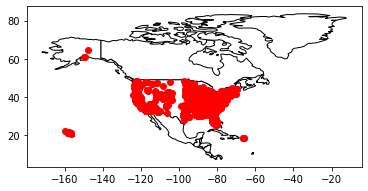

In [44]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Restricting to North America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')
plt.show()

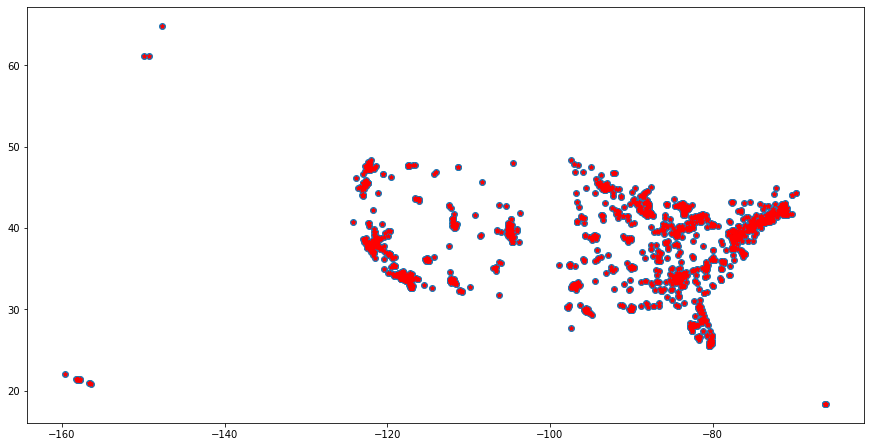

In [45]:
fig,ax = plt.subplots(figsize = (15,15))
gdf.plot(ax = ax)
g = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '*',label = 'US')
plt.show()

In [46]:
#calculating bad debt
train_df['bad_debt']=train_df['second_mortgage']+train_df['home_equity']-train_df['home_equity_second_mortgage']

In [47]:
train_df['bad_debt'].aggregate([min,max])

min    0.0000
max    0.6875
Name: bad_debt, dtype: float64

In [48]:
train_df['debt'].aggregate([min,max])

min    0.02539
max    0.97826
Name: debt, dtype: float64

In [49]:
overall_debt = train_df['debt'].sum()
overall_debt

9843.5766

In [50]:
bad_debt = train_df['bad_debt'].sum()
bad_debt

1650.3344299999999

In [51]:
percent_bad_debt = (bad_debt/overall_debt)*100
percent_bad_debt

16.765597476023096

In [52]:
data = {'Percent of Debts':[16.7,83.3]}

pie_data = pd.DataFrame(data, index =['bad_dept','good_dept'])
pie_data

,Percent of Debts
bad_dept,16.7
good_dept,83.3


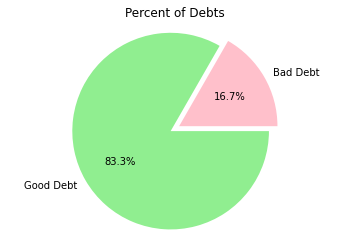

In [53]:
my_labels = 'Bad Debt','Good Debt'
my_colors = ['pink','lightgreen']
my_explode = (0.1, 0)
plt.pie(pie_data['Percent of Debts'],labels=my_labels,colors=my_colors,autopct='%1.1f%%',explode=my_explode)
plt.title('Percent of Debts')
plt.axis('equal')
plt.show()

Totally there is 16.7 % of bad debts in total debts

In [54]:
train_df['Percent of Bad Debt'] = (train_df['bad_debt']/train_df['debt'])*100

In [55]:
train_df['Percent of Bad Debt'].aggregate([min,max])

min      0.0
max    100.0
Name: Percent of Bad Debt, dtype: float64

In [56]:
train_df['Percent of Bad Debt'].value_counts()

0.000000      735
100.000000     12
16.666667       3
6.250000        3
25.000000       3
             ... 
29.389072       1
18.815266       1
24.972182       1
27.800748       1
24.428976       1
Name: Percent of Bad Debt, Length: 14876, dtype: int64

735 users have zero bad depts and 12 users have all 100 % as bad debt

In [57]:
#Considering that the cutomers who have above 10 % bad debts are non acceptable 
train_df['bins'] = pd.cut(train_df['Percent of Bad Debt'],bins=[0,10,100], labels=["Acceptable Bad Dept","Non Acceptable Bad Dept"])

array([<AxesSubplot:ylabel='None'>], dtype=object)

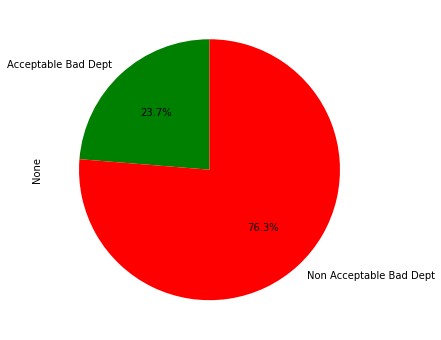

In [58]:
my_color = ['green','red']
train_df.groupby(['bins']).size().plot.pie(subplots=True,startangle=90,figsize=(6,6), autopct='%1.1f%%',colors=my_color)

From the above pie chart, it is observed thta 76.3 % of users have bad debt above 10 % of their total debts

In [59]:
train_df['bins'].value_counts()

Non Acceptable Bad Dept    11371
Acceptable Bad Dept         3534
Name: bins, dtype: int64

In [60]:
train_df['city'].nunique()

5222

Since we have 5222 cities, it is difficult to show all without compromising readability. Hence I have limited my selection with 20 cities. 

In [61]:
cities = train_df['city'].value_counts().head(20)
cities.index

Index(['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Las Vegas', 'Phoenix', 'Miami', 'Baltimore', 'Bronx',
       'Springfield', 'Detroit', 'Columbus', 'Milwaukee', 'Dallas',
       'Pittsburgh', 'Louisville', 'Washington', 'Kansas City'],
      dtype='object')

In [62]:
cities_for_analysis = ['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami', 'Detroit',
       'Bronx', 'Columbus', 'Dallas', 'Springfield', 'Indianapolis',
       'San Diego', 'Milwaukee', 'Jacksonville', 'Washington']

In [63]:
analysis_df =train_df[train_df['city'].isin (cities_for_analysis)]

In [64]:
analysis_df['city'].nunique()

20

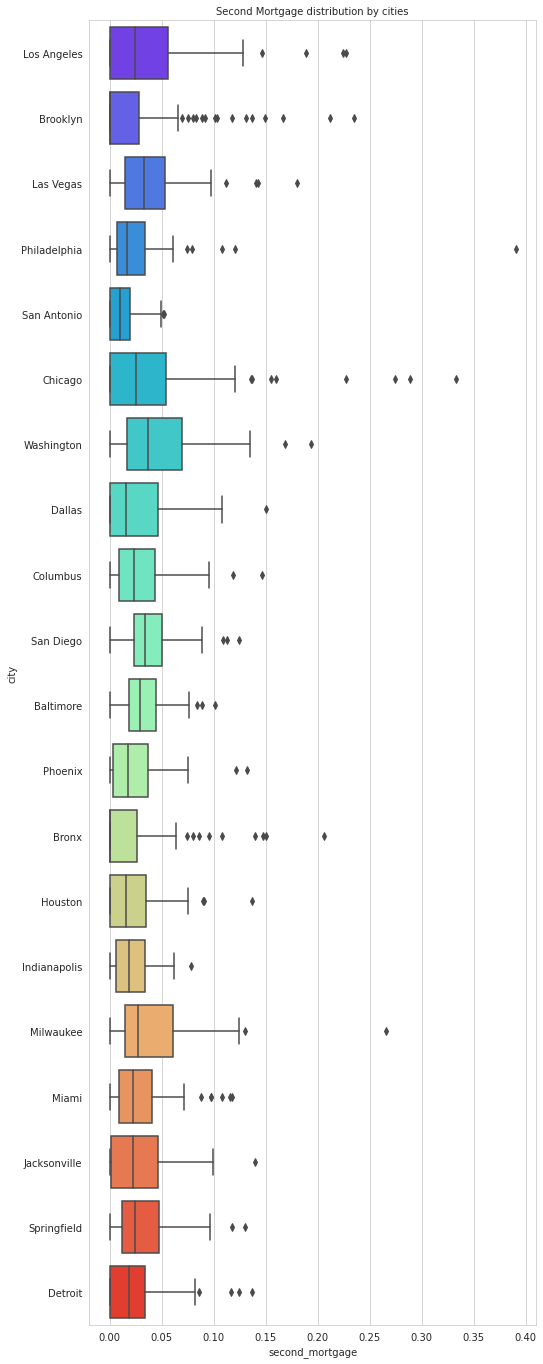

In [65]:
sns.set_style("whitegrid")
plt.figure(figsize = (8, 24))

sns.boxplot(x='second_mortgage',y='city',data=analysis_df,palette='rainbow').set_title('Second Mortgage distribution by cities', fontsize = 10)
plt.show()

More Outliers denotes the many families have extremely higher second mortage than others.
San Antonio has the least mean of second mortage in these 20 cities

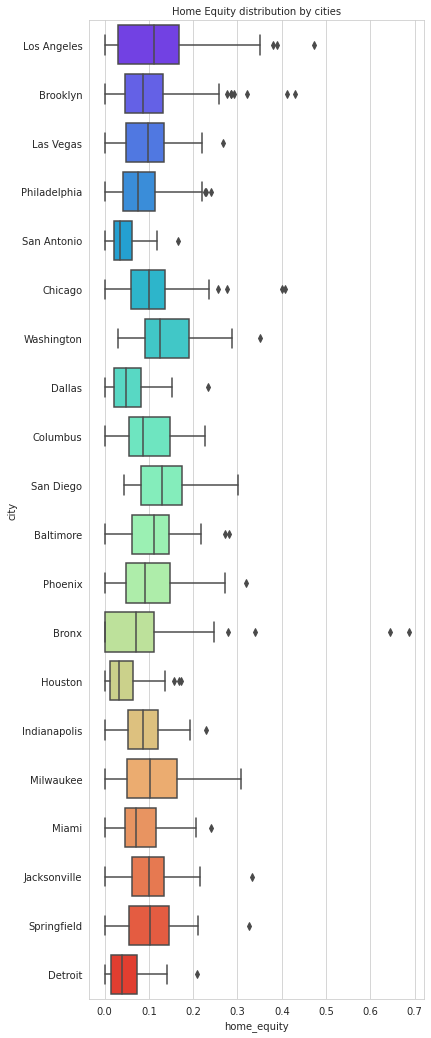

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize = (6, 18))

sns.boxplot(x='home_equity',y='city',data=analysis_df,palette='rainbow').set_title('Home Equity distribution by cities', fontsize = 10)
plt.show()

Home equity in Washington is too high and Los Angeles also have higher home equity.

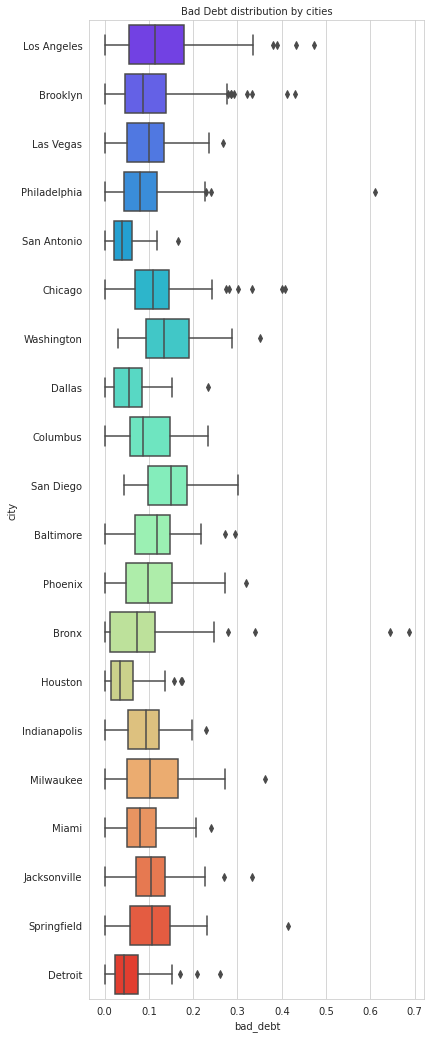

In [67]:
sns.set_style("whitegrid")
plt.figure(figsize = (6, 18))

sns.boxplot(x='bad_debt',y='city',data=analysis_df,palette='rainbow').set_title('Bad Debt distribution by cities', fontsize = 10)
plt.show()

Cities such as Los Angeles, Los Vegas, Chicago, Washington, San Diego, Baltimore, Springfield have bad debt mean more than 10%.

In [68]:
analysis_df['good_debt']= analysis_df['debt'] - analysis_df['bad_debt']

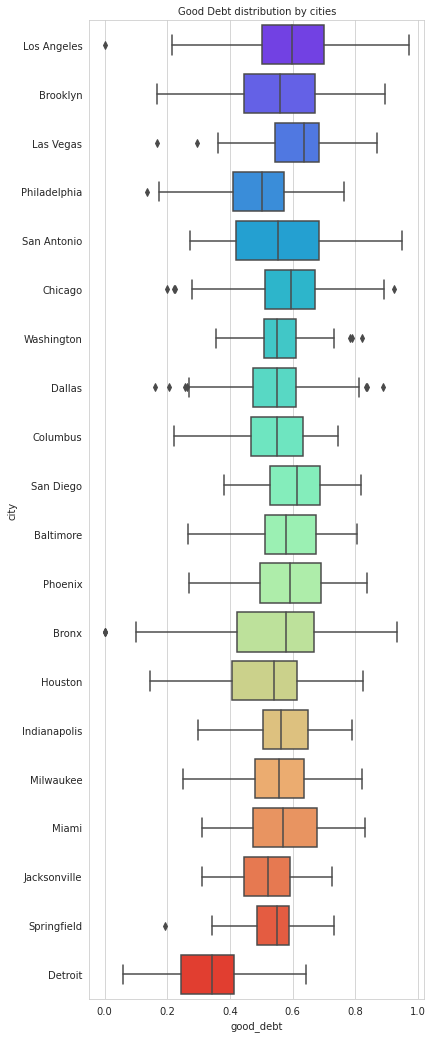

In [69]:
sns.set_style("whitegrid")
plt.figure(figsize = (6, 18))

sns.boxplot(x='good_debt',y='city',data=analysis_df,palette='rainbow').set_title('Good Debt distribution by cities', fontsize = 10)
plt.show()

City Detroit have low good debt and San Diego, las Vegas have high good debt.

In [70]:
train_df['remaining_income'] = train_df['family_mean'] - train_df['hi_mean']

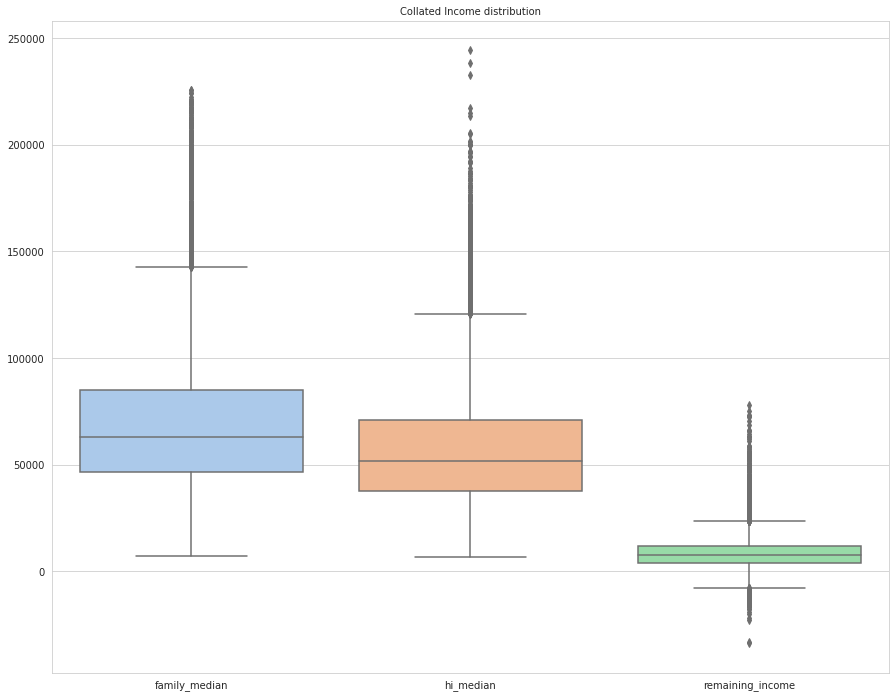

In [71]:
sns.set_style("whitegrid")
plt.figure(figsize = (15, 12))
sns.boxplot(data=train_df[['family_median', 'hi_median', 'remaining_income']], palette="pastel").set_title('Collated Income distribution', fontsize = 10)
plt.show()

From the above plot, it is clear that Few families have higher income and savings. And also remaining income is negative for some families denotes that their income is not enough.

In [72]:
train_df['pop_density']=train_df['pop']/train_df['ALand']

In [73]:
train_df['pop_density'].aggregate([min,max])

min    1.171706e-08
max    7.197562e-02
Name: pop_density, dtype: float64

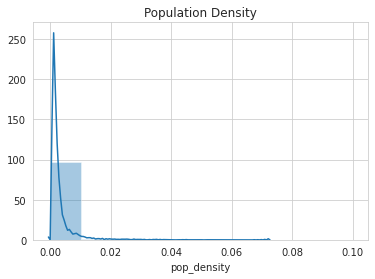

In [74]:
sns.distplot(train_df['pop_density'],bins=[0,0.01,0.05,0.1])
plt.title('Population Density')
plt.show()

Very less dense population is noticed

In [75]:
train_df['median_age'] = (train_df['male_age_median'] *  train_df['male_pop'] + train_df['female_age_median'] *  train_df['female_pop'])  / train_df['pop']

In [76]:
train_df['median_age'].describe()

count    15640.000000
mean        39.399610
std          7.477943
min         13.378362
25%         34.314440
50%         39.341453
75%         43.939475
max         80.166670
Name: median_age, dtype: float64

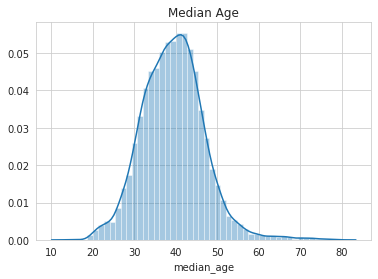

In [77]:
sns.distplot(train_df['median_age'])
plt.title('Median Age')
plt.show()

In [78]:
train_df['pop'].describe()

count    15640.000000
mean      4370.332289
std       2100.692358
min         66.000000
25%       2935.000000
50%       4079.000000
75%       5456.250000
max      53812.000000
Name: pop, dtype: float64

In [79]:
train_df['pop_bins']=pd.cut(train_df['pop'],bins=5,labels=['very low','low','medium','high','very high'])

In [80]:
train_df['pop_bins'].value_counts()

very low     15485
low            149
medium           4
very high        1
high             1
Name: pop_bins, dtype: int64

Since the count is not normally distributed, randomly spliting the bins.

In [81]:
train_df['pop_bins']=pd.cut(train_df['pop'],bins=[0,2000,3000,4000,6000,55000],labels=['very low','low','medium','high','very high'])

In [82]:
train_df['pop_bins'].value_counts()

high         5280
medium       3404
very high    2815
low          2780
very low     1361
Name: pop_bins, dtype: int64

In [83]:
train_df.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])

,married,separated,divorced
,mean,mean,mean
pop_bins,,,
very low,0.457314,0.024698,0.114512
low,0.494765,0.020516,0.109855
medium,0.511992,0.018739,0.103319
high,0.520044,0.018329,0.096861
very high,0.544487,0.017240,0.088467


Not much difference is noticed for married, separated, divorced in these five bins. Very high population brackets have more married and less divorced and Very low population brackets have more divorced and less married.

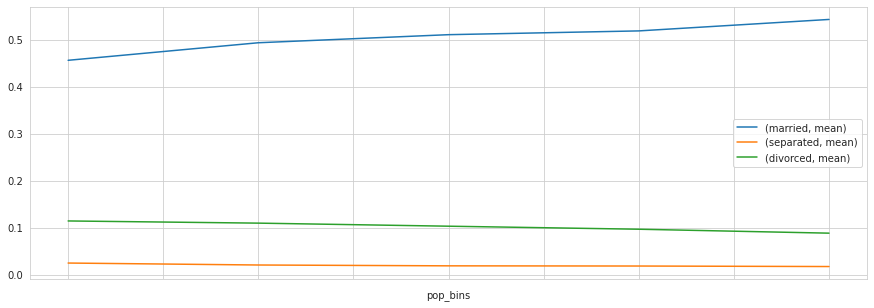

In [84]:
pop_bin=train_df.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin.plot(figsize=(15,5))
plt.legend(loc='best')
plt.show()

In [85]:
train_df['rent_mean'].sum() / train_df['hi_mean'].sum() * 100

1.4915138668814822

In [86]:
rent_state=train_df.groupby(by='state')['rent_mean'].agg(["mean"])

In [87]:
income_state=train_df.groupby(by='state')['family_mean'].agg(["mean"])

In [88]:
percent_rent_state = (rent_state/income_state) * 100

In [89]:
percent_rent_state

,mean
state,
Alabama,1.144138
Alaska,1.276153
Arizona,1.481805
Arkansas,1.133639
California,1.675937
Colorado,1.362972
Connecticut,1.269633
Delaware,1.281017
District of Columbia,1.323654


Rent is lower in the states South Dakota, North Dakota and Lowa and higher in states California, Hawaii and Florida.

In [90]:
#correlation matrix
corr_mat = train_df.corr()
corr_mat

,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,...,pct_own,married,married_snp,separated,divorced,bad_debt,Percent of Bad Debt,remaining_income,pop_density,median_age
COUNTYID,1.000000,0.223912,0.040333,0.071110,-0.149484,0.067856,0.016750,0.022044,0.004176,0.006319,...,-0.013969,-0.029444,0.047414,0.077383,0.056590,-0.137684,-0.137062,-0.014615,-0.080917,-0.077781
STATEID,0.223912,1.000000,-0.254140,0.047463,0.114403,0.311596,-0.018703,-0.033585,-0.032380,-0.032632,...,0.069626,0.022621,-0.024184,0.037034,0.015914,-0.151123,-0.127755,0.033743,-0.013631,-0.022760
zip_code,0.040333,-0.254140,1.000000,-0.001497,-0.067410,-0.925587,0.073752,0.039342,0.078153,0.095410,...,-0.070390,0.028668,0.019670,-0.047465,0.052682,-0.080604,-0.120650,-0.101116,-0.125370,-0.126820
area_code,0.071110,0.047463,-0.001497,1.000000,-0.125364,-0.017003,0.017654,0.027813,0.039285,0.040451,...,0.005987,0.047480,0.038993,0.031039,-0.041268,-0.000237,-0.018385,-0.056441,-0.021742,-0.026907
lat,-0.149484,0.114403,-0.067410,-0.125364,1.000000,0.023983,0.105219,0.084648,-0.099158,-0.093851,...,0.056636,0.036815,-0.164287,-0.144477,-0.057369,0.220909,0.214296,0.116496,0.050272,0.003179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bad_debt,-0.137684,-0.151123,-0.080604,-0.000237,0.220909,-0.003077,-0.084920,-0.029818,0.110615,0.105592,...,0.145507,0.189301,-0.173775,-0.169969,-0.237293,1.000000,0.927877,0.045875,0.006463,0.054029
Percent of Bad Debt,-0.137062,-0.127755,-0.120650,-0.018385,0.214296,0.042174,-0.073097,-0.021619,0.034183,0.030849,...,0.135173,0.162884,-0.160227,-0.150092,-0.180485,0.927877,1.000000,0.107223,-0.007946,0.149914
remaining_income,-0.014615,0.033743,-0.101116,-0.056441,0.116496,0.106881,-0.006558,0.003454,-0.131207,-0.138448,...,-0.039794,-0.101912,-0.130761,-0.076137,0.082614,0.045875,0.107223,1.000000,-0.016456,0.190384
pop_density,-0.080917,-0.013631,-0.125370,-0.021742,0.050272,0.072695,-0.046317,-0.015501,0.024589,0.012758,...,-0.433018,-0.243987,0.228129,0.104831,-0.161445,0.006463,-0.007946,-0.016456,1.000000,-0.200003


In [91]:
#filtering the strong positive and negative correlation features
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(train_df, .9)

debt                    debt_cdf                      -0.975055
home_equity             home_equity_cdf               -0.962221
bad_debt                home_equity_cdf               -0.946681
zip_code                lng                           -0.925587
hi_stdev                hi_mean                        0.903429
pop                     hi_samples                     0.907275
female_age_samples      hi_samples                     0.910978
rent_gt_35              rent_gt_40                     0.911836
Percent of Bad Debt     home_equity                    0.911866
median_age              female_age_mean                0.912873
male_age_samples        family_samples                 0.913132
second_mortgage         home_equity_second_mortgage    0.914864
male_age_sample_weight  female_age_sample_weight       0.915598
family_mean             hi_stdev                       0.925655
Percent of Bad Debt     bad_debt                       0.927877
family_mean             hi_median       

In [92]:
print(train_df.dtypes.head(40))
print(train_df.dtypes.tail(40))

COUNTYID                  int64
STATEID                   int64
state                    object
state_ab                 object
city                     object
place                    object
type                     object
zip_code                  int64
area_code               float64
lat                     float64
lng                     float64
ALand                   float64
AWater                  float64
pop                     float64
male_pop                float64
female_pop              float64
rent_mean               float64
rent_median             float64
rent_stdev              float64
rent_sample_weight      float64
rent_samples            float64
rent_gt_10              float64
rent_gt_15              float64
rent_gt_20              float64
rent_gt_25              float64
rent_gt_30              float64
rent_gt_35              float64
rent_gt_40              float64
rent_gt_50              float64
universe_samples        float64
used_samples            float64
hi_mean 

In [93]:
train_df.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_

In [94]:
corr_df = train_df[['COUNTYID', 'STATEID','zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples','hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_female', 'male_age_mean',
       'male_age_median', 'male_age_stdev', 'male_age_sample_weight',
       'male_age_samples', 'female_age_mean', 'female_age_median',
       'female_age_stdev', 'female_age_sample_weight', 'female_age_samples',
       'pct_own', 'married', 'married_snp', 'separated', 'divorced',
       'bad_debt', 'Percent of Bad Debt', 'remaining_income',
       'pop_density', 'median_age']]

In [95]:
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

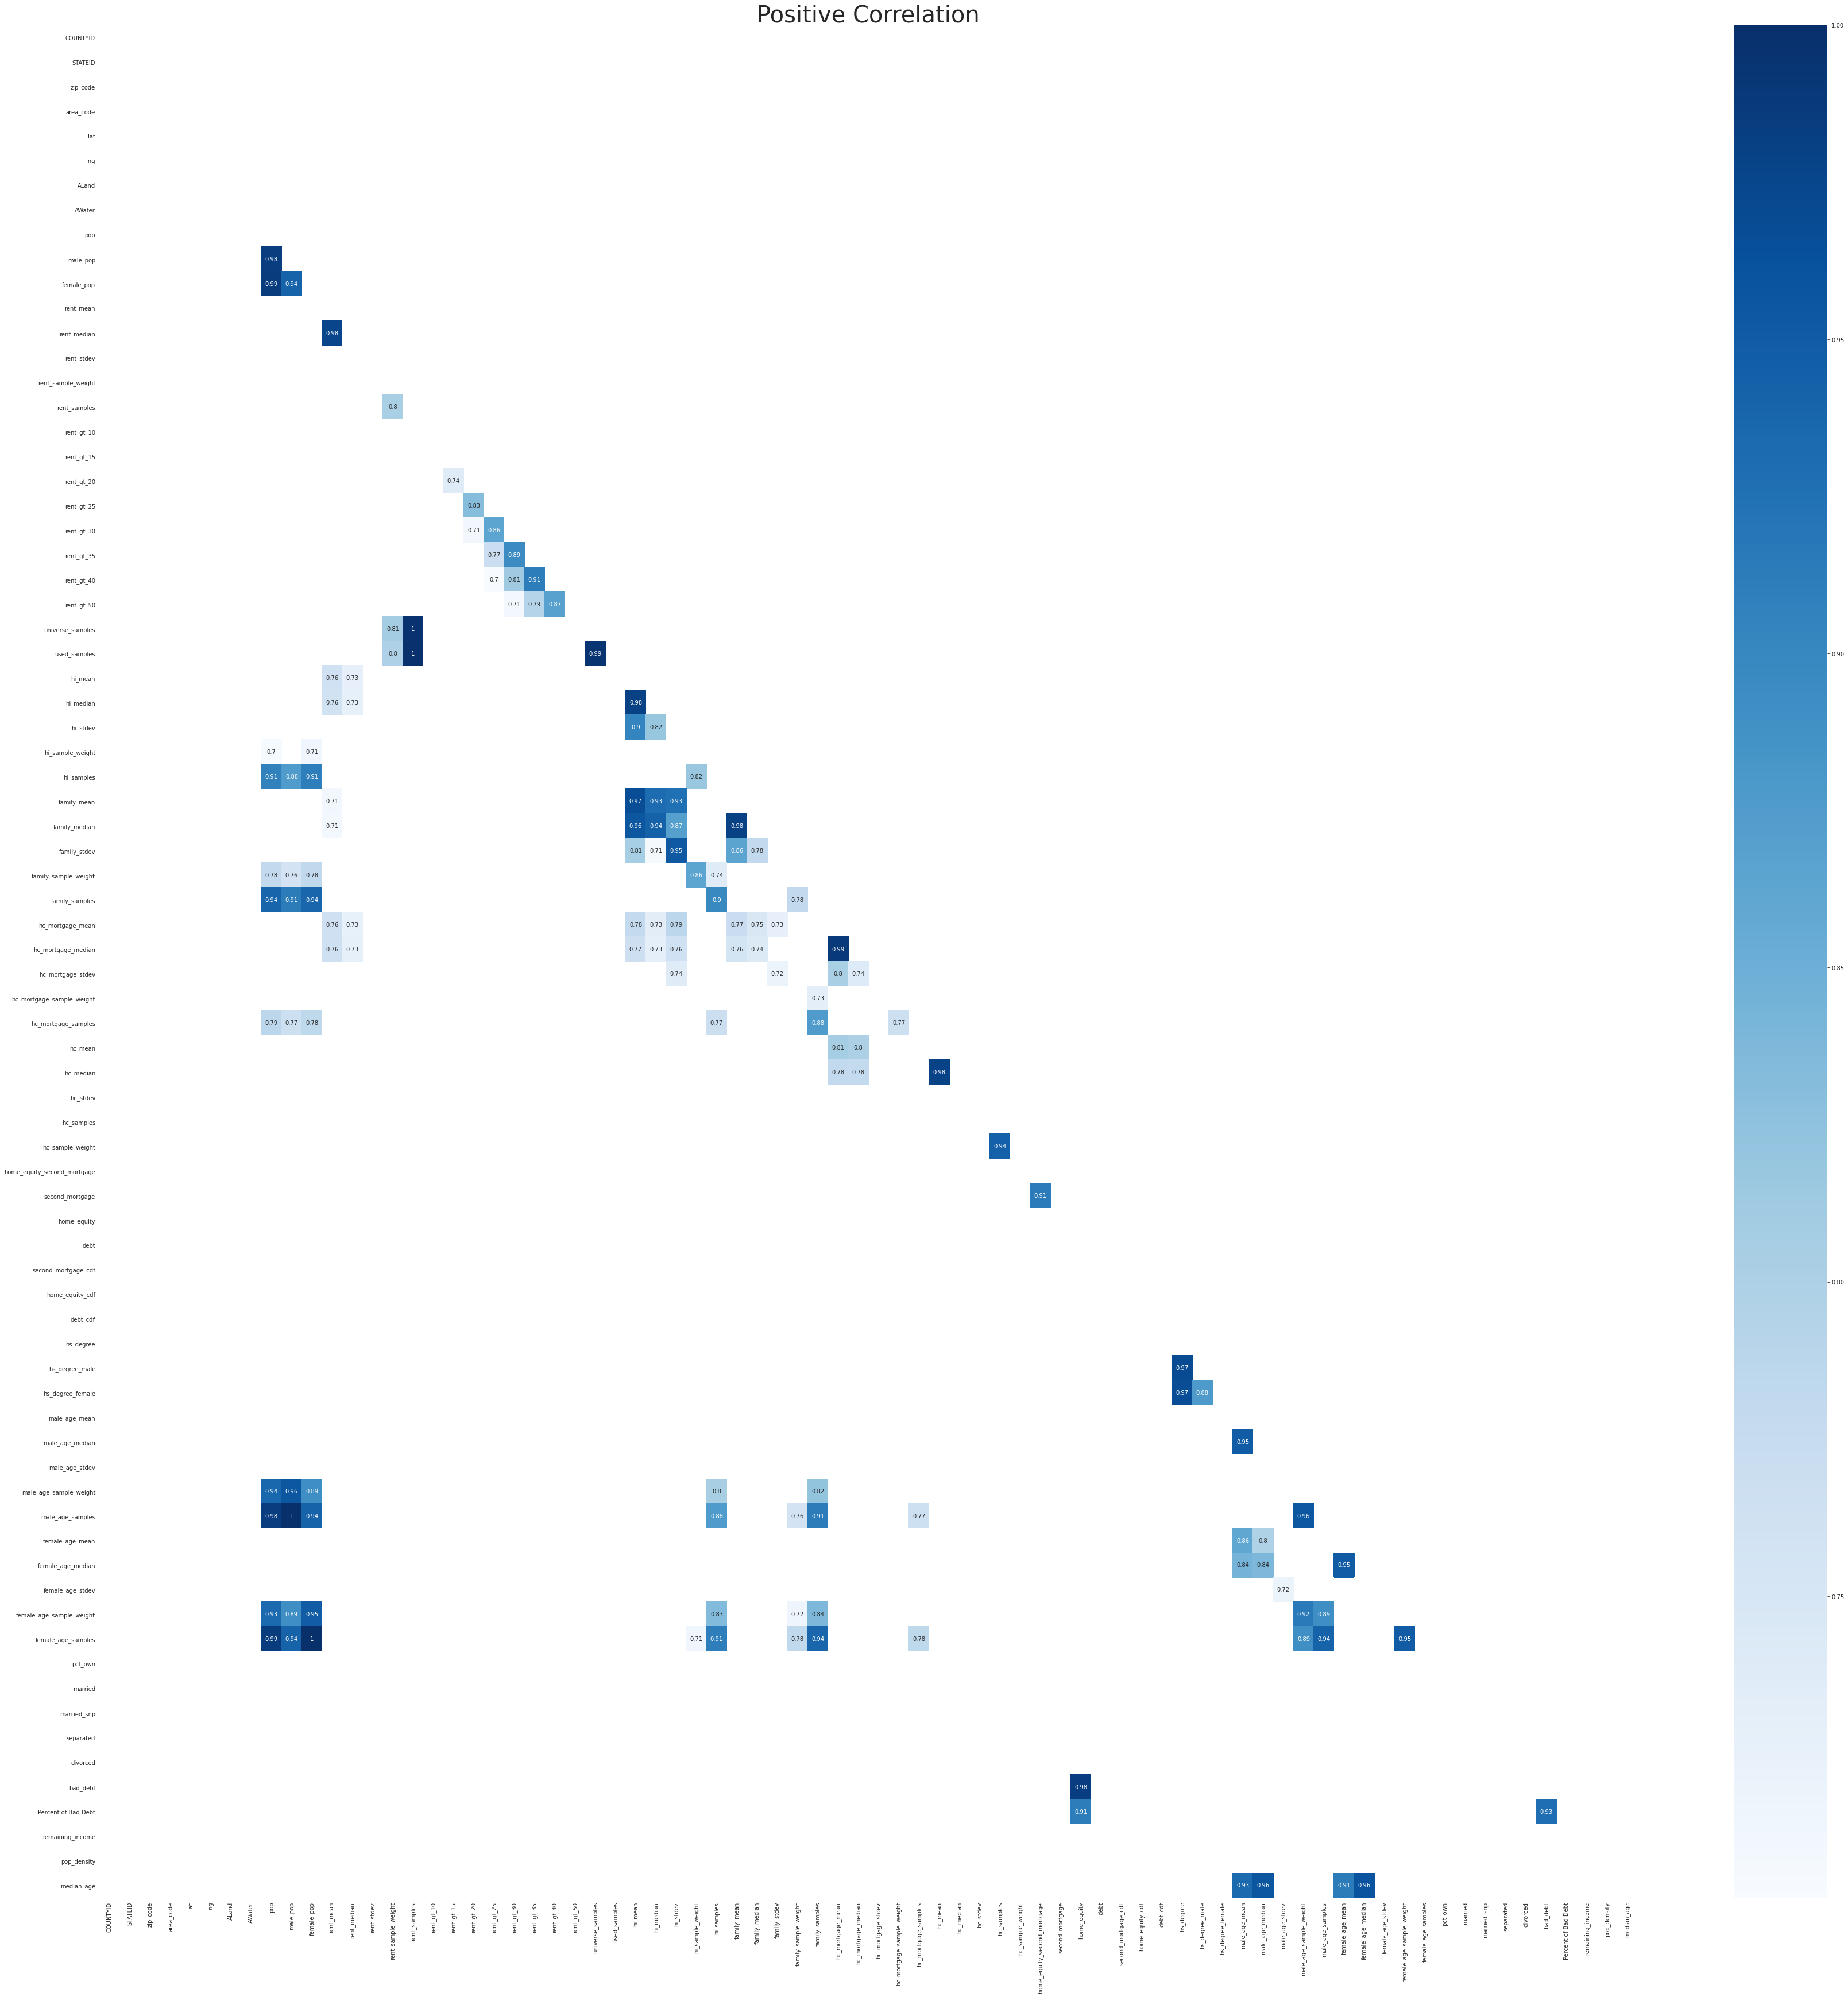

In [96]:
#positive correlaion chart
sns.set_style("whitegrid")
pos = corr_mat[corr_mat >= .7]
plt.figure(figsize=(60,60))
sns.heatmap(pos, cmap="Blues", annot = True, mask = mask).set_title('Positive Correlation', fontsize = 40)
plt.show()

hi_stdev and hi_mean, pop and hi_samples, female_age_samples and hi_samples, rent_gt_35 and rent_gt_40, Percent of Bad Debt and home_equity, median_age and female_age_mean, male_age_samples and family_samples, second_mortgage and home_equity_second_mortgage, male_age_sample_weight and female_age_sample_weight, family_mean and hi_stdev, Percent of Bad Debt and bad_debt, family_mean and hi_median, male_age_mean and median_age, pop and female_age_sample_weight, male_age_sample_weight and pop, family_samples and female_pop, family samples and pop, male_pop and female_age_samples, family_median and hi_median, hc_samples and hc_sample_weight, female_pop and female_age_sample_weight, male_age_mean and male_age_median, female_age_mean and female_age_median, hi_stdev and family_stdev, family_median and hi_mean, male_age_samples and male_age_sample_weight, male_age_median and median_age, female_age_median and median_age, hs_degree and hs_degree_female, hi_mean and family_mean, hs_degree_male and hs_degree, rent_median and rent_mean, hc_median and hc_mean, family_median and family_mean, hi_mean and hi_median, home_equity and bad_debt, pop and male_age_samples, female_pop and pop, hc_mortgage_mean and hc_mortgage_median, universe_samples and used_samples, universe_samples and rent_samples, used_samples and rent_samples have strong postive correlation. 

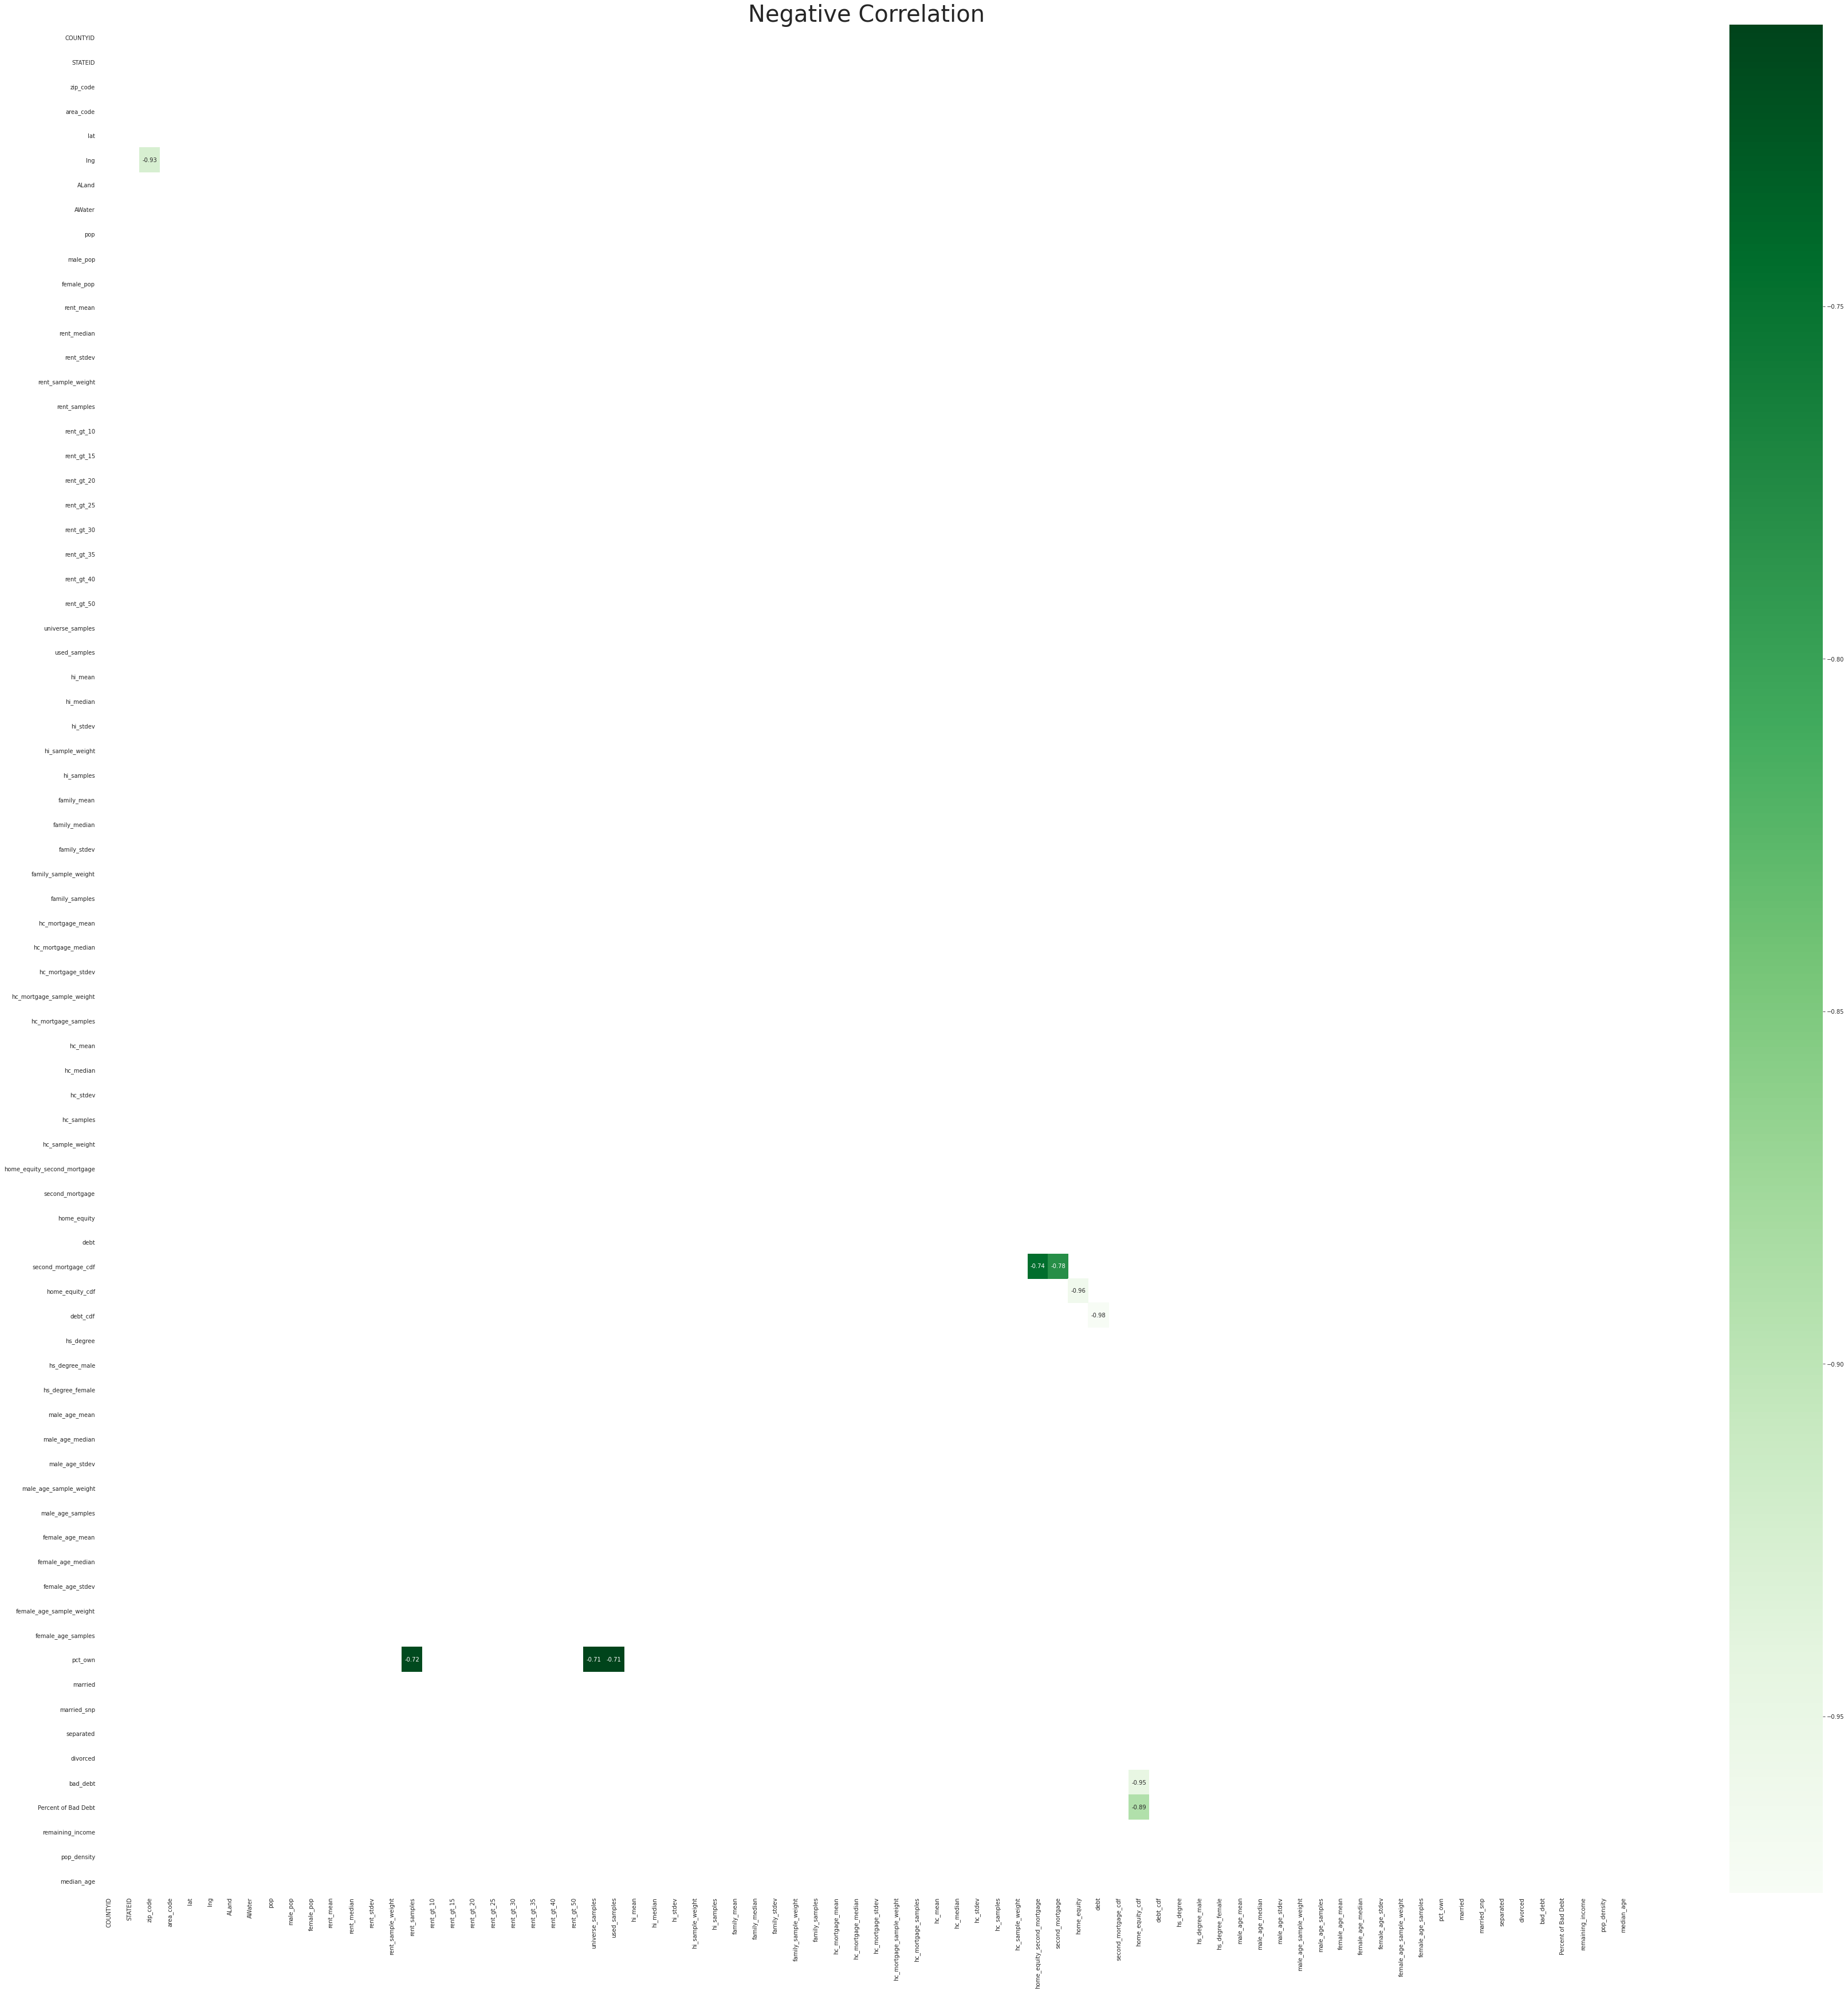

In [97]:
#negative correlation chart
neg  = corr_mat[corr_mat <= -.7]
plt.figure(figsize=(60,60))
sns.heatmap(neg, cmap="Greens", annot = True, mask = mask).set_title('Negative Correlation', fontsize = 40)
plt.show()

pct_own and rent_samples, pct_own and universe samples, pct_own and used samples, Percent of bad debt and home equity cdf, bad bedt and home equity cdf, second mortage cdf and home equity cdf, debt and second mortage cdf, home equity and debt , second mortage and debt have strong Negative Correlation

In [98]:
def cat_variables(df):
    cat_variables = list(df.select_dtypes(exclude = ['int', 'float']).columns)
    return cat_variables

In [99]:
def num_variables(df):
    num_variables = list(df.select_dtypes(include = ['int', 'float']).columns)
    return num_variables

In [100]:
cat_columns = ['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type', 'zip_code', 'area_code']

In [101]:
for col in cat_columns:
    train_df[col] = train_df[col].astype('category')

In [102]:
cat_variables(train_df)

['COUNTYID',
 'STATEID',
 'state',
 'state_ab',
 'city',
 'place',
 'type',
 'zip_code',
 'area_code',
 'bins',
 'pop_bins']

In [103]:
num_variables(train_df)

['lat',
 'lng',
 'ALand',
 'AWater',
 'pop',
 'male_pop',
 'female_pop',
 'rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'universe_samples',
 'used_samples',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weight',
 'male_age_samples',
 'female_age_mean',
 'fema

**Data Pre-processing:**

In [104]:
factor_train = train_df[num_variables(train_df)]
factor_train

,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,...,pct_own,married,married_snp,separated,divorced,bad_debt,Percent of Bad Debt,remaining_income,pop_density,median_age
UID,,,,,,,,,,,,,,,,,,,,,
267822,42.840812,-75.501524,202183361.0,1699120.0,5230.0,2612.0,2618.0,769.38638,784.0,232.63967,...,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408,17.763344,4868.86384,0.000026,44.667430
246444,41.701441,-86.266614,1560828.0,100363.0,2633.0,1349.0,1284.0,804.87924,848.0,253.46747,...,0.52483,0.34886,0.01426,0.01426,0.09030,0.04274,7.023252,8738.17744,0.001687,34.722748
245683,39.792202,-86.515246,69561595.0,284193.0,6881.0,3643.0,3238.0,742.77365,703.0,323.39011,...,0.85331,0.64745,0.02830,0.01607,0.10657,0.09512,12.944314,10319.83114,0.000099,41.774472
279653,18.396103,-66.104169,1105793.0,0.0,2700.0,1141.0,1559.0,803.42018,782.0,297.39258,...,0.65037,0.47257,0.02021,0.02021,0.10106,0.01086,2.060174,7668.01017,0.002442,49.879012
247218,39.195573,-96.569366,2554403.0,0.0,5637.0,2586.0,3051.0,938.56493,881.0,392.44096,...,0.13046,0.12356,0.00000,0.00000,0.03109,0.05426,10.447072,22219.26930,0.002207,21.965629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265060,32.905671,-105.994917,99523850.0,27856.0,5587.0,2930.0,2657.0,744.35988,665.0,307.60671,...,0.47452,0.45813,0.09009,0.06564,0.13354,0.03978,8.576418,5425.06148,0.000056,29.236699
277549,40.620612,-75.389286,1319547.0,101921.0,4505.0,2294.0,2211.0,935.95367,870.0,378.25692,...,0.45294,0.43287,0.03504,0.03504,0.03603,0.17686,25.480478,10528.01055,0.003414,36.564354
262241,40.793041,-96.687947,2090055.0,0.0,5931.0,2805.0,3126.0,711.41149,682.0,262.02050,...,0.57034,0.49377,0.02046,0.00712,0.08897,0.11028,14.711258,14576.87135,0.002838,33.452539


In [105]:
#pip install factor_analyzer

In [106]:
from factor_analyzer import FactorAnalyzer

In [107]:
#with these columns, singular matrix is formed.  So dropping it
factor_train.drop(columns = ['lat', 'lng','ALand'] , axis=1, inplace=True)

In [108]:
#Creating factor analysis object and perform factor analysis
#randomly choosing factors as 12
fa = FactorAnalyzer( rotation=None, n_factors = 12)
fa.fit(factor_train)

FactorAnalyzer(n_factors=12, rotation=None, rotation_kwargs={})

In [109]:
ev, v = fa.get_eigenvalues()
ev

array([ 1.62198319e+01,  1.23156946e+01,  8.91241027e+00,  4.74550842e+00,
        4.24167242e+00,  3.46517139e+00,  2.24886202e+00,  1.52047096e+00,
        1.30226728e+00,  1.14410895e+00,  1.12582190e+00,  1.06879448e+00,
        9.94869607e-01,  8.44944924e-01,  7.93200874e-01,  7.77459479e-01,
        6.27156257e-01,  5.74509542e-01,  5.59230135e-01,  4.87669625e-01,
        4.34196411e-01,  3.93611057e-01,  3.52771718e-01,  3.26738732e-01,
        3.13404794e-01,  3.00661181e-01,  2.54854672e-01,  2.41150246e-01,
        2.36229071e-01,  2.08153832e-01,  1.98848007e-01,  1.85046128e-01,
        1.65416529e-01,  1.54799911e-01,  1.36614474e-01,  1.31997963e-01,
        1.17939194e-01,  1.09737710e-01,  1.04211184e-01,  9.45150824e-02,
        9.02879368e-02,  7.54847620e-02,  6.09049033e-02,  5.84852309e-02,
        4.02922715e-02,  3.19624257e-02,  3.08709371e-02,  2.68711723e-02,
        2.23240308e-02,  2.09488162e-02,  1.86337475e-02,  1.61355259e-02,
        1.53339562e-02,  

In [110]:
print(sorted(ev, reverse=True))

[16.219831901227145, 12.315694590700446, 8.912410271659384, 4.745508418856665, 4.241672416765899, 3.465171392495952, 2.2488620172979314, 1.5204709608187545, 1.3022672783441511, 1.1441089462556502, 1.1258218977642849, 1.0687944803821452, 0.9948696066790288, 0.8449449237518306, 0.7932008735639124, 0.7774594793587574, 0.627156257489192, 0.5745095424307296, 0.559230135401607, 0.48766962546026277, 0.4341964105141148, 0.39361105701068383, 0.3527717179000805, 0.3267387322453744, 0.3134047937893996, 0.3006611806774374, 0.2548546720256574, 0.24115024647121278, 0.23622907051062741, 0.2081538318351555, 0.19884800679569684, 0.18504612840404355, 0.16541652866066828, 0.15479991083390332, 0.13661447366663554, 0.13199796283168472, 0.11793919409075149, 0.10973771027493304, 0.10421118441906445, 0.09451508237806651, 0.09028793679832516, 0.07548476202229575, 0.06090490330666457, 0.05848523090293667, 0.0402922714662966, 0.03196242574202705, 0.030870937063130665, 0.026871172264393763, 0.022324030822365826, 

In [111]:
loadings = fa.loadings_

In [112]:
xvals = range(1, factor_train.shape[1]+1)

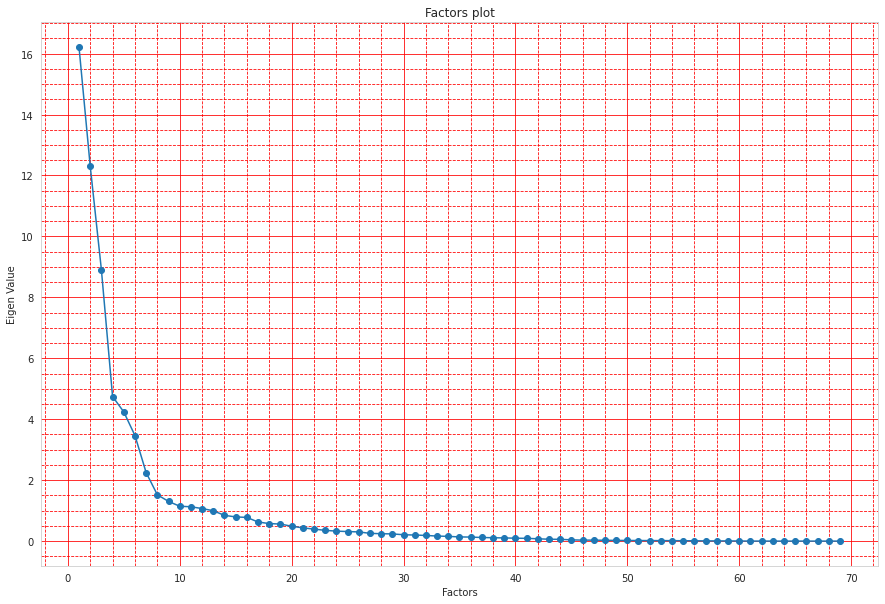

In [113]:
plt.figure(figsize = (15,10))
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Factors plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid(color = 'red', )
plt.grid(b=True, which='minor', color='r', linestyle='--')
plt.minorticks_on()
plt.show()

plot shows that optimum factors are 12

In [114]:
Factors  = pd.DataFrame.from_records(loadings)

Factors = Factors.add_prefix('Factor ')

Factors.index = factor_train.columns
Factors

,Factor 0,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9,Factor 10,Factor 11
AWater,-0.010518,-0.025068,0.023569,-0.014843,0.024611,-0.014323,0.000616,-0.027047,0.033846,-0.004983,0.011193,0.015491
pop,0.280337,0.934148,0.137549,0.053110,0.015129,-0.106682,0.057097,-0.006905,0.012387,-0.024986,-0.007281,-0.018394
male_pop,0.271432,0.910227,0.134323,0.034300,0.016927,-0.124261,0.068446,-0.015906,0.040229,-0.065168,-0.008558,-0.035513
female_pop,0.279779,0.925589,0.135738,0.069334,0.012699,-0.084376,0.042555,0.002529,-0.016294,0.017258,-0.005289,0.000823
rent_mean,0.746171,-0.019321,-0.347010,0.169309,0.091885,-0.214016,0.063253,0.215544,0.102243,-0.027329,0.026929,0.380453
...,...,...,...,...,...,...,...,...,...,...,...,...
bad_debt,0.642689,0.012365,-0.334353,-0.104128,-0.469272,0.301651,0.135720,-0.144984,-0.219211,-0.215769,-0.010078,0.043810
Percent of Bad Debt,0.554334,-0.060477,-0.234859,-0.021859,-0.424542,0.388803,0.198443,-0.278530,-0.199159,-0.248346,0.071985,0.095722
remaining_income,0.120997,-0.134161,0.042181,0.098732,0.229972,0.409976,-0.277484,-0.241097,0.049955,-0.009065,0.052181,-0.211233
pop_density,-0.027711,0.089750,-0.416762,0.070264,0.309353,0.071337,0.189097,0.084980,0.019194,-0.022240,-0.037067,0.033479


From the analysis, it is observed that related parameters are loading on Unique Factors.
From the above dataframe, it is clear that Factor 0 has greater influence on Bad debt.
Above Dataframe shows that which factors has greater influence and which factors has lesser influence on the mentined variables such as Highschool graduation rates, Median population age, Second mortgage statistics, Percent own.

In [115]:
fact_variance  = fa.get_factor_variance()
fact_variance

(array([16.07392349, 12.24611159,  8.7606541 ,  4.5771665 ,  4.08059185,
         3.332396  ,  2.00777392,  1.30915206,  1.11022259,  0.96889657,
         0.82982776,  0.69381864]),
 array([0.23295541, 0.17747988, 0.126966  , 0.06633575, 0.05913901,
        0.04829559, 0.02909817, 0.01897322, 0.01609018, 0.01404198,
        0.01202649, 0.01005534]),
 array([0.23295541, 0.41043529, 0.53740129, 0.60373704, 0.66287605,
        0.71117165, 0.74026982, 0.75924304, 0.77533322, 0.7893752 ,
        0.80140169, 0.81145703]))

**Data Modelling:**

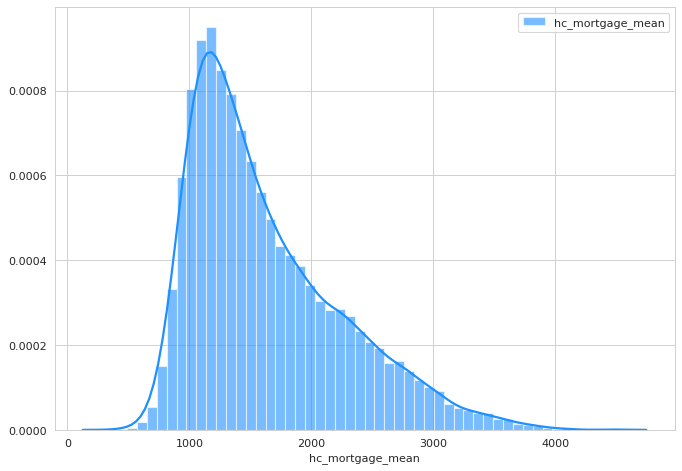

In [116]:
#Analysing whether predicted variables are normally distributed
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(train_df.hc_mortgage_mean, color="dodgerblue", label="hc_mortgage_mean", **kwargs)
plt.legend()

In [117]:
drop_column = ['state', 'state_ab', 'city', 'place','area_code', 'lat', 'lng'] 

In [118]:
train_df.drop(drop_column, axis=1, inplace=True)

In [119]:
train_df.columns

Index(['COUNTYID', 'STATEID', 'type', 'zip_code', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_female', 'male_age_mean',
       'male_age_median', 'male_age_stdev', 'm

In [120]:
analysis_col = ['bad_debt', 'Percent of Bad Debt', 'bins','remaining_income', 'pop_density', 'median_age', 'pop_bins']

In [121]:
train_df['type'].unique()
type_dict={'type':{'City':1, 
                   'Urban':2, 
                   'Town':3, 
                   'CDP':4, 
                   'Village':5, 
                   'Borough':6}
          }
train_df.replace(type_dict,inplace=True)

In [122]:
test_df.replace(type_dict,inplace=True)

In [123]:
train_df.drop(analysis_col, axis=1, inplace=True)

In [124]:
test_df.drop(drop_column, axis=1, inplace=True)

In [125]:
y_test = test_df['hc_mortgage_mean']

In [126]:
y_test.head()

UID
255504    1139.24548
252676    1533.25988
276314    1254.54462
248614     862.65763
286865    1996.41425
Name: hc_mortgage_mean, dtype: float64

Building the model by predicting hc mortgage mean with the features including hc mortgage median, hc_mortgage_stdev, hc_mortgage_sample_weight, hc_mortgage_samples will lead the model to overfitting when using other data. So removing the variables.

In [127]:
X_test = test_df.drop(columns=['hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples'])

In [128]:
y_train = train_df['hc_mortgage_mean']

In [129]:
X_train = train_df.drop(columns=['hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples'])

In [130]:
X_train.columns

Index(['COUNTYID', 'STATEID', 'type', 'zip_code', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female',
       'male_age_mean', 'male_age_median', 'male_age_stdev',
       'male_age_sample_weight', 'male_age_samples', 'female_age_mean',
       'female_age_median', 'female_age_stdev', 'female_age

In [131]:
features = ['COUNTYID', 'STATEID', 'type', 'zip_code', 'ALand', 'AWater', 'pop',
       'male_pop', 'female_pop', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'universe_samples', 'used_samples', 'hi_mean',
       'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight','family_samples','hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_female', 'male_age_mean',
       'male_age_median', 'male_age_stdev', 'male_age_sample_weight',
       'male_age_samples', 'female_age_mean', 'female_age_median',
       'female_age_stdev', 'female_age_sample_weight', 'female_age_samples',
       'pct_own', 'married', 'married_snp', 'separated', 'divorced']

In [132]:
print(X_train.shape, X_test.shape)

(15640, 64) (11355, 64)


In [133]:
print(y_train.shape,y_test.shape)

(15640,) (11355,)


In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [136]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [137]:
predict_train = lr_model.predict(X_train)
predict_test = lr_model.predict(X_test)

In [138]:
print("Overall R2 score of model with Training Dataset", r2_score(y_train,predict_train))
print("Overall RMSE of model with Training Dataset", np.sqrt(mean_squared_error(y_train,predict_train)))

print("Overall R2 score of model with Testing Dataset", r2_score(y_test,predict_test))
print("Overall RMSE of model with Testing Dataset", np.sqrt(mean_squared_error(y_test,predict_test)))

Overall R2 score of model with Training Dataset 0.8652536835842577
Overall RMSE of model with Training Dataset 227.7521566106537
Overall R2 score of model with Testing Dataset 0.8650391252975992
Overall RMSE of model with Testing Dataset 231.90247565618606


Regression model running at nation level is giving R2 score of 0.86 for both training and testing dataset. Hence the model works fine. However we are running the model in state level also.

In [139]:
train_df['STATEID'].unique()

[36, 18, 72, 20, 1, ..., 31, 38, 35, 23, 10]
Length: 52
Categories (52, int64): [36, 18, 72, 20, ..., 38, 35, 23, 10]

In [140]:
#Running model for only 5 states
for i in [20,1,36,45,12]:
    print("State ID-",i)
    
    X_train_state=train_df[train_df['STATEID']==i][features]
    y_train_state=train_df[train_df['STATEID']==i]['hc_mortgage_mean']
    
    X_test_state=test_df[test_df['STATEID']==i][features]
    y_test_state=test_df[test_df['STATEID']==i]['hc_mortgage_mean']
    
    lr_model.fit(X_train_state,y_train_state)
    train_pred_state=lr_model.predict(X_train_state)
    test_pred_state=lr_model.predict(X_test_state)
    
    print("Overall R2 score of model for state in training dataset :-" ,r2_score(y_train_state,train_pred_state))
    print("Overall RMSE of model for state in training dataset :-" ,np.sqrt(mean_squared_error(y_train_state,train_pred_state)))
    print("Overall R2 score of model for state in testing dataset :-" ,r2_score(y_test_state,test_pred_state))
    print("Overall RMSE of model for state in testing dataset :-" ,np.sqrt(mean_squared_error(y_test_state,test_pred_state)))
    print("\n")

State ID- 20
Overall R2 score of model for state in training dataset :- 0.9417596003228995
Overall RMSE of model for state in training dataset :- 90.77149163676147
Overall R2 score of model for state in testing dataset :- 0.8857989715849466
Overall RMSE of model for state in testing dataset :- 139.97602113456477


State ID- 1
Overall R2 score of model for state in training dataset :- 0.8481929893609697
Overall RMSE of model for state in training dataset :- 112.3707611767292
Overall R2 score of model for state in testing dataset :- 0.7376365234613274
Overall RMSE of model for state in testing dataset :- 156.5636180804061


State ID- 36
Overall R2 score of model for state in training dataset :- 0.7935903813839316
Overall RMSE of model for state in training dataset :- 341.80430027887513
Overall R2 score of model for state in testing dataset :- 0.7754549838371012
Overall RMSE of model for state in testing dataset :- 363.22091913659835


State ID- 45
Overall R2 score of model for state in t

In state level also model have good R2 score.

In [141]:
residuals_train=y_train-predict_train
residuals_train

UID
267822     58.928316
246444   -106.098753
245683    -16.356801
279653    153.720753
247218   -136.102811
             ...    
265060     87.842671
277549   -179.585823
262241     13.288445
224337    161.129071
279550     76.684108
Name: hc_mortgage_mean, Length: 15640, dtype: float64

In [142]:
residuals_test=y_test-predict_test
residuals_test

UID
255504    -12.570384
252676      8.328140
276314    134.067233
248614     84.548563
286865   -154.606519
             ...    
238088   -195.473175
242811    115.599474
250127    -13.157743
241096    -17.068062
287763    -51.928950
Name: hc_mortgage_mean, Length: 11355, dtype: float64

<AxesSubplot:xlabel='hc_mortgage_mean'>

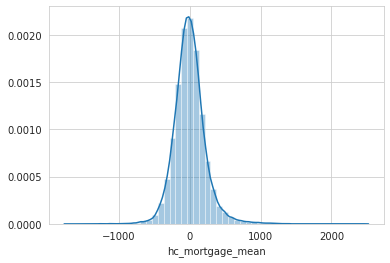

In [143]:
sns.distplot(residuals_train)

<AxesSubplot:xlabel='hc_mortgage_mean'>

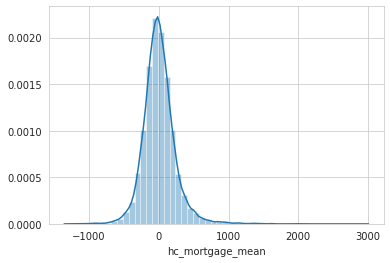

In [144]:
sns.distplot(residuals_test)